In [1]:
#importing matplotlib dependency
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#importing nump, pandas, and datetime dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
#verify after you can get the engine to connect
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
#obtaining list of columns for the Measurement table
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c['type'])   

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
#obtaining list of columns for the Station table
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [12]:
# Find the most recent date in the data set.
recent_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [13]:
# Calculate the date one year from the last date in data set.
year_dates = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_dates

datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the dates and precipitation scores
precip_amts = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_dates).all()

precip_amts

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_amts , columns = ['date', 'prcp'])
precip_df.set_index('date', inplace = True)

# Sort the dataframe by date
precip_df.sort_values(by='date')

# Cleaning the dataframe
clean_precip=precip_df.dropna()
clean_precip

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


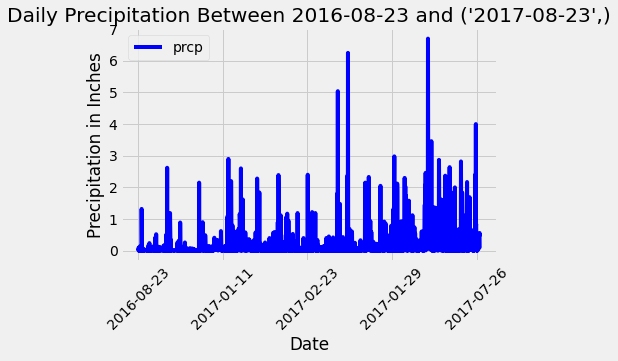

In [59]:
clean_precip.plot(x_compat=True, color='blue')

plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.title(f"Daily Precipitation Between {year_dates} and {recent_date}")
plt.xticks(rotation = 45)

plt.tight_layout
plt.show();

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
agg_precip = round(clean_precip.describe(),2)

agg_precip

,prcp
count,2021.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(func.count(Station.id)).all()

num_stations

[(9,)]

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations= session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()

stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
#Identifying the most active station
most_active = session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()

most_active_station=most_active[0]

print(f'The most active station is : {most_active_station}.')

The most active station is : USC00519281.


In [21]:
#Using the most active station id from the previous query, calculate the lowest, highest, and average temperature
temps = session.query(Measurement.station, func.min(Measurement.tobs), \
                                    func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                                    filter(Measurement.station==most_active_station).all()
print(temps)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [22]:
#printing the results
print(f'The lowest temperature was {temps[0][1]} degress Fahrenheit.')
print(f'The highest temperature was {temps[0][2]} degrees Fahrenheit')
print(f'The average temperature was {round(temps[0][3],2)} degrees Fahrenheit.')

The lowest temperature was 54.0 degress Fahrenheit.
The highest temperature was 85.0 degrees Fahrenheit
The average temperature was 71.66 degrees Fahrenheit.


In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
year_precip = pd.DataFrame(session.query(Measurement.tobs).\
     filter(Measurement.date >= year_dates).\
     filter(Measurement.station == most_active_station).all())

year_precip

,0
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


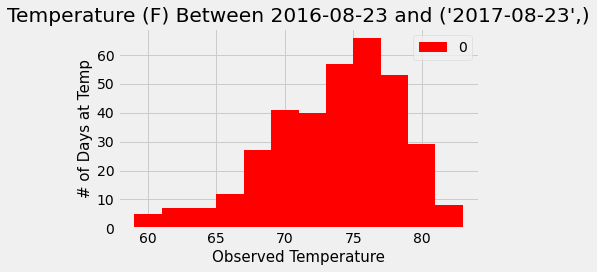

In [58]:
#plot the results as a histogram

year_precip.plot.hist(bins=12, color = 'red')
plt.xlabel("Observed Temperature", fontsize=15)
plt.ylabel("# of Days at Temp", fontsize=15)
plt.title(f"Temperature (F) Between {year_dates} and {recent_date}")
#plt.legend("Temp", loc='upper left')
plt.tight_layout()
plt.show();

# Close session

In [25]:
# Close Session
session.close()